In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Load Dataset

### 1 means survived, 0 deceased

In [101]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [102]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [103]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
train['Age'].isnull().value_counts()

Age
False    714
True     177
Name: count, dtype: int64

Embarked has two null values, we need to fill them with the most common value!

In [105]:
train['Embarked'].isnull().value_counts()

Embarked
False    889
True       2
Name: count, dtype: int64

Cabin has multiple null values, we will set as Unknown

In [106]:
train['Cabin'].isnull().value_counts()

Cabin
True     687
False    204
Name: count, dtype: int64

In [107]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

In [108]:
train['Age'].isnull().value_counts()

Age
False    891
Name: count, dtype: int64

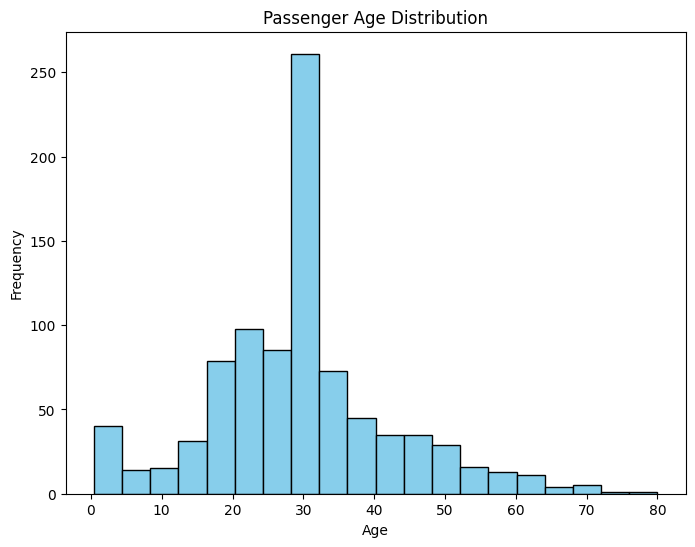

In [109]:
age = train.dropna(subset=['Age'])
# Plotting
plt.figure(figsize=(8, 6))
plt.hist(age['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Passenger Age Distribution')
plt.show()


In [110]:
#Calculate the mode of the Embarked values
mode_embarked = train['Embarked'].mode()[0]
train['Embarked'].fillna(mode_embarked, inplace=True)
train['Embarked'].isnull().value_counts()

Embarked
False    891
Name: count, dtype: int64

In [111]:

train['Cabin'].fillna('Unknown', inplace=True)
train['Cabin'].isnull().value_counts()

Cabin
False    891
Name: count, dtype: int64

In [112]:
train['Cabin'].value_counts()

Cabin
Unknown        687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

In [113]:
survived_by_sex = train.groupby(['Survived', 'Sex']).size().reset_index(name='Count')
survived_by_sex.columns

Index(['Survived', 'Sex', 'Count'], dtype='object')

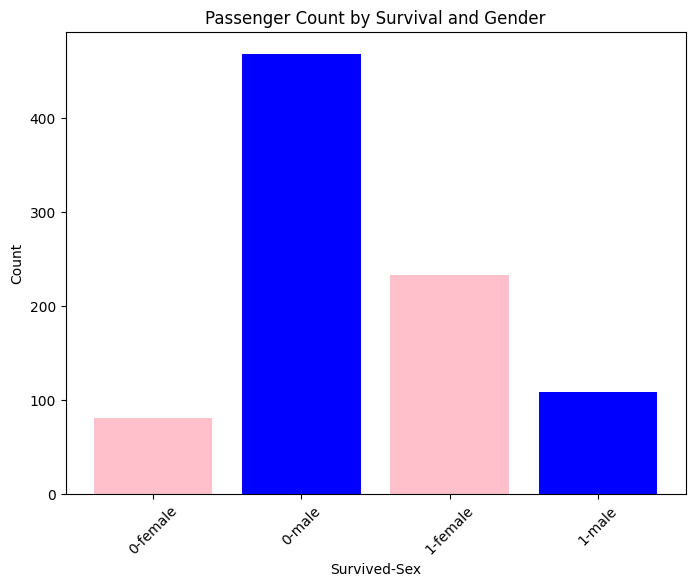

In [114]:


# Plotting
plt.figure(figsize=(8, 6))
# Define colors for each gender
colors = {'male': 'blue', 'female': 'pink'}
bars = plt.bar(survived_by_sex['Survived'].astype(str) + '-' + survived_by_sex['Sex'],
               survived_by_sex['Count'], color=[colors[gender.lower()] for gender in survived_by_sex['Sex']])
plt.xlabel('Survived-Sex')
plt.ylabel('Count')
plt.title('Passenger Count by Survival and Gender')
plt.xticks(rotation=45)
plt.show()


In [115]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [116]:
train['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [117]:
train_df = train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]

In [118]:
train_df.loc[train_df["Sex"] == 'male', "Sex"] = 1
train_df.loc[train_df["Sex"] == 'female', "Sex"] = 0
train_df.loc[train_df["Embarked"] == 'S', "Embarked"] = 0
train_df.loc[train_df["Embarked"] == 'C', "Embarked"] = 1
train_df.loc[train_df["Embarked"] == 'Q', "Embarked"] = 2


In [119]:
scaler = StandardScaler()
columns_to_normalize = ['Age', 'Fare']
train_df[columns_to_normalize] = scaler.fit_transform(train_df[columns_to_normalize])

/tmp/ipykernel_76205/3481551542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[columns_to_normalize] = scaler.fit_transform(train_df[columns_to_normalize])


In [120]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.592481,1,0,-0.502445,0
1,1,1,0,0.638789,1,0,0.786845,1
2,1,3,0,-0.284663,0,0,-0.488854,0
3,1,1,0,0.407926,1,0,0.420730,0
4,0,3,1,0.407926,0,0,-0.486337,0


In [121]:
train_df.to_csv('Preprocess/train_ds.csv', index=False)

In [122]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

## Test set

In [123]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [124]:
test = test.merge(gender_submission, on='PassengerId')

In [125]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [126]:
test_df = test[['Survived','Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df.loc[test_df["Sex"] == 'male', "Sex"] = 1
test_df.loc[test_df["Sex"] == 'female', "Sex"] = 0
test_df.loc[test_df["Embarked"] == 'S', "Embarked"] = 0
test_df.loc[test_df["Embarked"] == 'C', "Embarked"] = 1
test_df.loc[test_df["Embarked"] == 'Q', "Embarked"] = 2

/tmp/ipykernel_76205/1186545881.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)


In [127]:
test_df = test_df.dropna()

In [128]:
test_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,2
1,1,3,0,47.0,1,0,7.0000,0
2,0,2,1,62.0,0,0,9.6875,2
3,0,3,1,27.0,0,0,8.6625,0
4,1,3,0,22.0,1,1,12.2875,0


In [129]:
scaler = StandardScaler()
columns_to_normalize = ['Age', 'Fare']
test_df[columns_to_normalize] = scaler.fit_transform(test_df[columns_to_normalize])
test_df.to_csv('Preprocess/test_ds.csv', index=False)

In [130]:
rows_with_nan = test_df[test_df.isna().any(axis=1)]

In [131]:
rows_with_nan

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
